<a href="https://colab.research.google.com/github/AlexeiAltamira/Portfolio/blob/main/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação das bibliotecas

In [30]:
import pandas as pd #importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import matplotlib.pyplot as plt #Importar a biblioteca para criação de gráficos
from sklearn.preprocessing import StandardScaler #Ferramenta para padronizar os valores
from yellowbrick.cluster import kelbow_visualizer #Ferramenta de visualização usada para auxiliar na identificação do número ideal de clusters.
from sklearn.cluster import KMeans #Importa ferramenta para treina modelo para criação dos clusterns

# Carregar arquivo

In [31]:
dados= pd.read_csv('https://www.notion.so/signed/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fe73c934e-cd3a-4e00-85f6-b704762fec77%2Fdata.csv?table=block&id=e9f1a77d-e0db-46c4-8ef0-c79064da3c0e&spaceId=6a055055-52ec-4ebb-a697-63027c951344&userId=c0845f00-59fb-4a0f-bb4a-c1e2314cd202&cache=v2', encoding='unicode_escape')
# Usa biblioteca pandas para abrir arquivo data.csv, que contem os dados a serem analisados, direto do site.
# Usado o: encoding='unicode_escape' - para corrigir caracteres não legíveis do arquivo

# Análise dos dados

In [32]:
dados.head(5) # Verificar se o arquivo a ser analisado esta correto. Podendo ser visualizado as 5 linhas iniciais

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [33]:
dados.dtypes # Identificar tipos dos dados de cada coluna. Observado necessidade de correções (tipo de dados divergentes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [34]:
dados.isna().sum() # Verificar e contar dados nulos em todas as colunas.
#Podendo ser observado dados nulos de identificação do cliente, coluna fundamental para o projeto. Observado necessidade de correções.

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [35]:
dados.info() # Outra forma, condensada, de verificar presença de valores nulos e os tipos de dados de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [36]:
dados.describe() # Verificar concentração dos dados e/ ou discrepantes.
#Observado necessidade de correções (Quantity e UnitPrice menor que zero, presença de outliers).

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [37]:
dados.duplicated().sum() # Identificar se existe linhas duplicadas. Observado necessidade de correções (há valores duplicados)

5268

# Pré-processamento

In [38]:
dados = dados.drop_duplicates() # Deixando no dataset apenas os dados não duplicados

In [39]:
dados.dropna(subset=['Description','CustomerID'],axis=0,how='any',inplace=True) # Elimina as linhas com valor nulo na coluna 'Description' e 'CustomerID'

In [40]:
dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate']) # Transforma a coluna de data da transação, que não esta sendo reconhecida corretamente, por Date Time
dados['CustomerID'] = dados['CustomerID'].astype(int) # Altera o dtype do 'CustomerID' de Float para Int
dados.head(5) # Fazer uma reavaliação visual se as alterações realizadas até o momento estão corretas

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [41]:
dados[dados['Quantity']<=0]['Quantity'].count() # Realiza contagem das linhas onde quantidade de produtos é menor ou igual a zero.

8872

In [42]:
dados[dados['UnitPrice']<=0]['UnitPrice'].count() # Realiza contagem das linhas onde o preço unitário é menor ou igual a zero.


40

In [43]:
dados = dados[dados['Quantity'] > 0] # Deixa no dateset somente os dados onde a quantidade de produtos é maior que zero
dados = dados[dados['UnitPrice'] > 0] # Deixa no dateset somente os dados onde o preço unitário é maior que zero

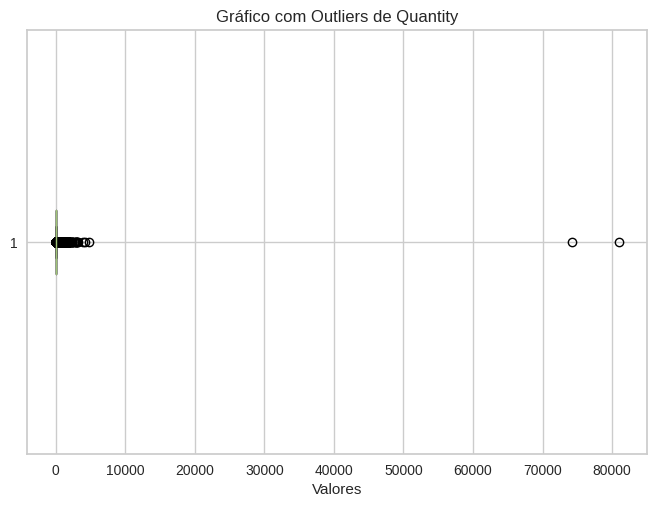

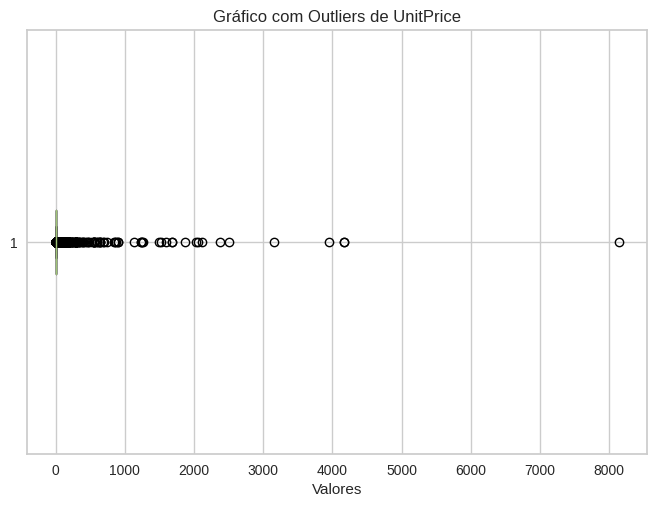

In [44]:
# Criando o gráfico de caixa (boxplot) para visualizar os outliers
plt.boxplot(dados['Quantity'], vert=False)
plt.title('Gráfico com Outliers de Quantity')
plt.xlabel('Valores')
plt.show()

plt.boxplot(dados['UnitPrice'], vert=False)
plt.title('Gráfico com Outliers de UnitPrice')
plt.xlabel('Valores')
plt.show()

In [45]:
dados[dados['Quantity']>27]['Quantity'].count() # Verifica e conta quantos valores da coluna Quantity são Outliers (valor de 27 foi definido após ir eliminando os Outliers)

25616

In [46]:
dados[dados['UnitPrice']>5]['UnitPrice'].count() # Verifica e conta quantos valores da coluna UnitPrice são Outliers (valor de 5 foi definido após ir eliminando os Outliers)

50738

In [47]:
dados = dados[dados['Quantity']< 28] # Deixando no dataset apenas quantidades sem Outliers, ou seja a baixo de 28.
dados = dados[dados['UnitPrice'] < 5] # Deixando no dataset apenas quantidades sem Outliers, ou seja a baixo de 5.
dados.describe()

,Quantity,UnitPrice,CustomerID
count,316879.000000,316879.000000,316879.000000
mean,7.737102,1.985643,15321.660318
std,6.836527,1.270138,1713.576487
min,1.000000,0.001000,12347.000000
25%,2.000000,0.950000,13985.000000
50%,6.000000,1.650000,15241.000000
75%,12.000000,2.950000,16818.000000
max,27.000000,4.980000,18287.000000


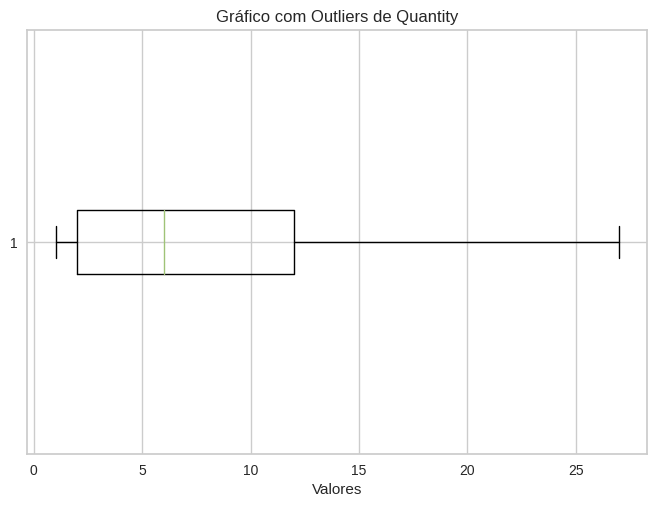

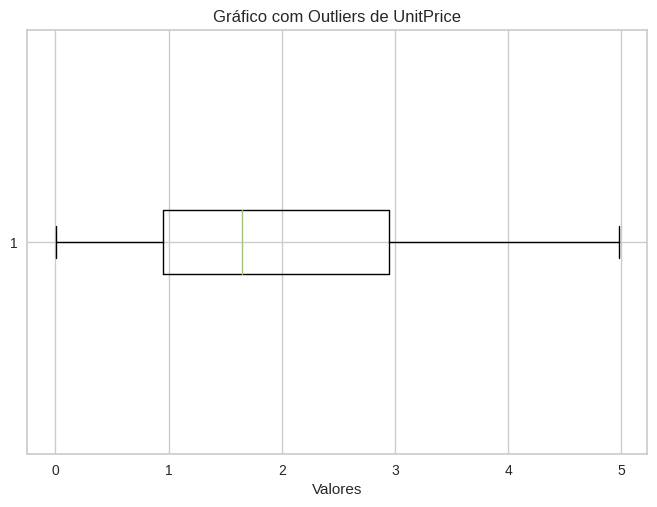

In [48]:
# Criando o gráfico de caixa (boxplot) para visualizar sem outliers
plt.boxplot(dados['Quantity'], vert=False)
plt.title('Gráfico com Outliers de Quantity')
plt.xlabel('Valores')
plt.show()

plt.boxplot(dados['UnitPrice'], vert=False)
plt.title('Gráfico com Outliers de UnitPrice')
plt.xlabel('Valores')
plt.show()

In [49]:
dados = dados.drop('InvoiceNo',axis=1) # Excluir a coluna 'InvoiceNo', pois, a partir desse momento, não exerce nunhuma função.
dados = dados.drop('StockCode',axis=1) # Excluir a coluna 'StockCode', pois, a partir desse momento, não exerce nunhuma função.

In [50]:
dados['Total'] = dados['Quantity'] * dados['UnitPrice'] # Cria nova coluna com a multiplicação da coluna quantidade e a coluna preço unitário
dados.head(5) # Verificar se as exclusões e a criação das dolunas foram realizadas

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [51]:
ultimo = dados['InvoiceDate'].max() # Identifica a data da última compra registrada no dataset
ultimo # Mostra a data da última compra registrada no dataset

Timestamp('2011-12-09 12:50:00')

In [52]:
usuario = dados.groupby(by=['CustomerID']).agg({'InvoiceDate': 'max', 'Quantity':'count', 'Total':'mean'}) # Agrupa pelo identificador do cliente. Mostra a data da
#última compra de cada cliente, contagem de compras realizados e a média do valor total dessa compra.
usuario # Mostra o novo dataframe com os dados agrupados

,InvoiceDate,Quantity,Total
CustomerID,,,
12347,2011-12-07 15:52:00,163,19.695644
12348,2011-04-05 10:47:00,6,15.033333
12349,2011-11-21 09:51:00,53,17.322642
12350,2011-02-02 16:01:00,16,18.400000
12352,2011-11-03 14:37:00,59,16.717627
...,...,...,...
18280,2011-03-07 09:52:00,7,17.021429
18281,2011-06-12 10:53:00,5,9.384000
18282,2011-12-02 11:43:00,7,14.232857


In [53]:
usuario['Recencia'] = (ultimo - usuario['InvoiceDate']).dt.days # Cria uma coluna com o tempo em dias da última compra do cliente e a última registrada
usuario.head(5) # Mostra o novo dataframe
#RFM - Recencia =  Coluna Recencia (diferença da última compra feita pelo cliente e a última compra registrada)
#RFM - Frequencia = Coluna Quantity (contagem de vezes que o cliente vez compras)
#RFM - Ticket medio = Coluna Total (média do valor total das compras)

,InvoiceDate,Quantity,Total,Recencia
CustomerID,,,,
12347,2011-12-07 15:52:00,163,19.695644,1
12348,2011-04-05 10:47:00,6,15.033333,248
12349,2011-11-21 09:51:00,53,17.322642,18
12350,2011-02-02 16:01:00,16,18.400000,309
12352,2011-11-03 14:37:00,59,16.717627,35


In [54]:
modelo = ['Quantity', 'Total', 'Recencia'] # Colunas usadas para treinar modelo com as características relevantes para clustering
transform = usuario.filter(modelo).copy() # Usado para filtrar colunas do DataFrame com base nos rótulos das colunas crianco uma copia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

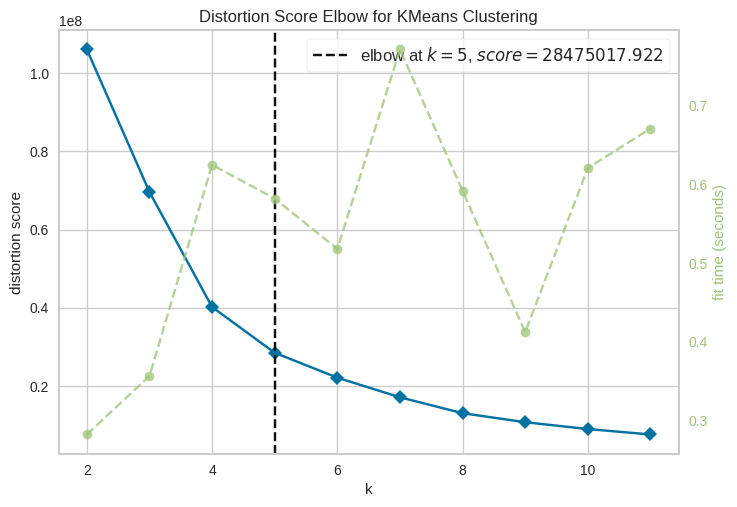

In [55]:
kelbow_visualizer(KMeans(), transform, k=11); # Ajuda a selecionar o número ideal de clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


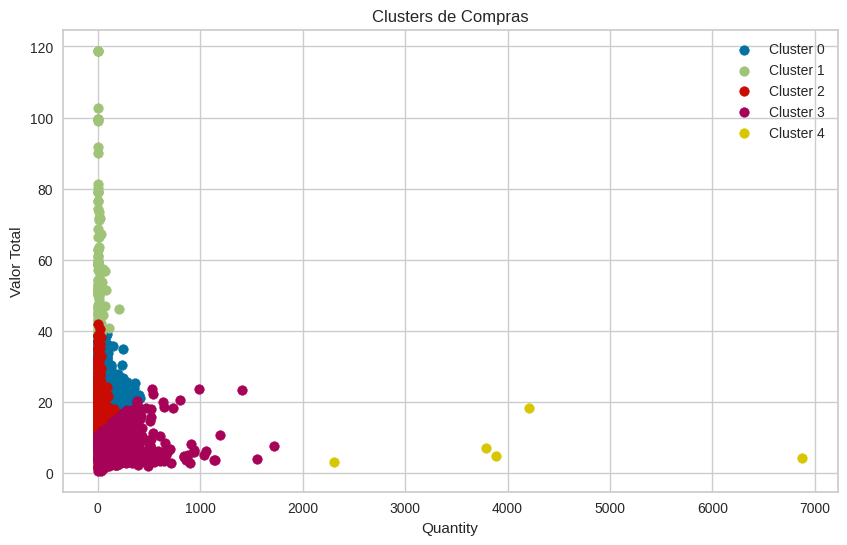

In [56]:
X = usuario[['Quantity', 'Total', 'Recencia']] # Selecionando as características relevantes para clustering

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Escolhendo o número de clusters através dos métodos de Elbow
num_clusters = 5

# Aplicando o algoritmo K-Means - escolhido após avaliação das outras ferramentas
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Adicionando os rótulos dos clusters aos dados originais
usuario['cluster'] = kmeans.labels_

# Visualizando os clusters
plt.figure(figsize=(10, 6))

for cluster in range(num_clusters):
    cluster_data = usuario[usuario['cluster'] == cluster]
    plt.scatter(cluster_data['Quantity'], cluster_data['Total'], label=f'Cluster {cluster}')

plt.xlabel('Quantity')
plt.ylabel('Valor Total')
plt.title('Clusters de Compras')
plt.legend()
plt.show()

# Optado uso do KMeans pois após uso das outras ferramentas de clusters, essa mostrou a melhor divisão dos grupos

#Analise os clusters obtidos

In [57]:
for cluster in range(0, 5):
  print(f'No grupo do cluster {cluster} as compras estão na média entre {usuario[usuario["cluster"]==cluster]["Total"].min():.2f} e {usuario[usuario["cluster"]==cluster]["Total"].max():.2f}.')
  print(f'Sendo realizadas entre {usuario[usuario["cluster"]==cluster]["Quantity"].min():.0f} e {usuario[usuario["cluster"]==cluster]["Quantity"].max():.0f} compras\n')
# Realiza uma analise descritiva das diferenças entre os clusters.


No grupo do cluster 0 as compras estão na média entre 10.18 e 39.95.
Sendo realizadas entre 1 e 410 compras

No grupo do cluster 1 as compras estão na média entre 39.55 e 118.80.
Sendo realizadas entre 1 e 208 compras

No grupo do cluster 2 as compras estão na média entre 1.26 e 41.93.
Sendo realizadas entre 1 e 259 compras

No grupo do cluster 3 as compras estão na média entre 0.71 e 23.79.
Sendo realizadas entre 1 e 1725 compras

No grupo do cluster 4 as compras estão na média entre 3.16 e 18.35.
Sendo realizadas entre 2306 e 6877 compras



* Gráfico apresentando valores que definem cada cluster.

* Minimo e maximo dos valores de compra e quantidade de itens de cada cluster.

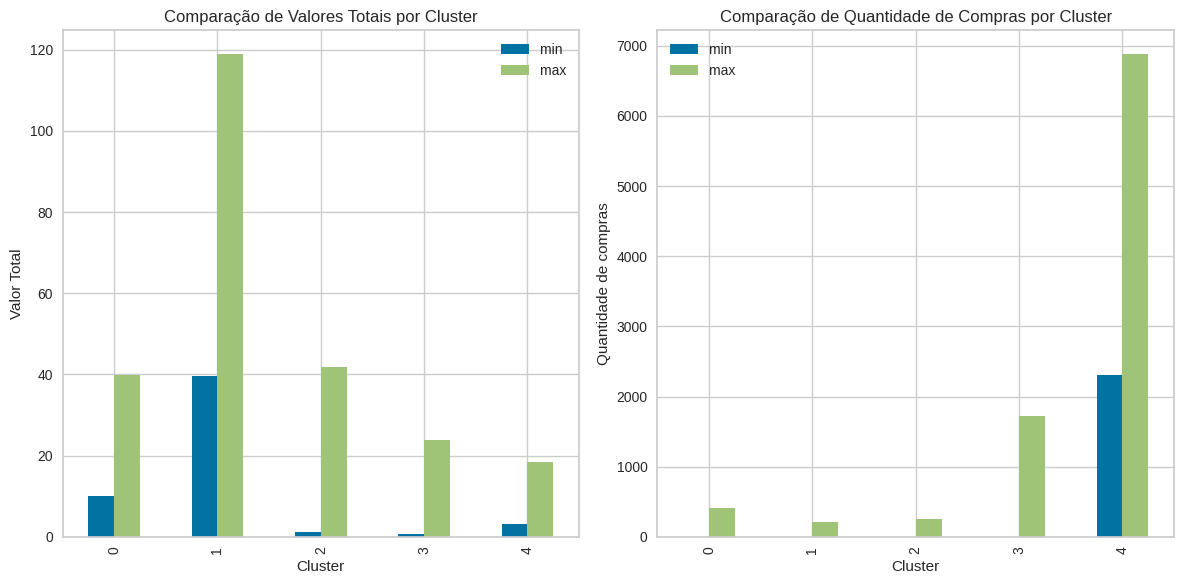

In [58]:
# Definindo os dados das colunas Total e Quantity
df_min_max_total = usuario.groupby('cluster')['Total'].agg(['min', 'max']) # Agrupa por cluster e identifica o valor minimo e o máximo da coluna Total de cada grupo de cluster
df_min_max_quantidade = usuario.groupby('cluster')['Quantity'].agg(['min', 'max']) # Agrupa por cluster e identifica o valor minimo e o máximo de coluna Quantity de cada grupo de cluster

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) # Define o tamanho do gráfico

# Gráfico 1: Valores Totais por Cluster
df_min_max_total.plot(kind='bar', ax=axs[0], title='Comparação de Valores Totais por Cluster')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Valor Total')

# Gráfico 2: Quantidade de compras por Cluster
df_min_max_quantidade.plot(kind='bar', ax=axs[1], title='Comparação de Quantidade de Compras por Cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Quantidade de compras')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

* Grupo com mais clusters

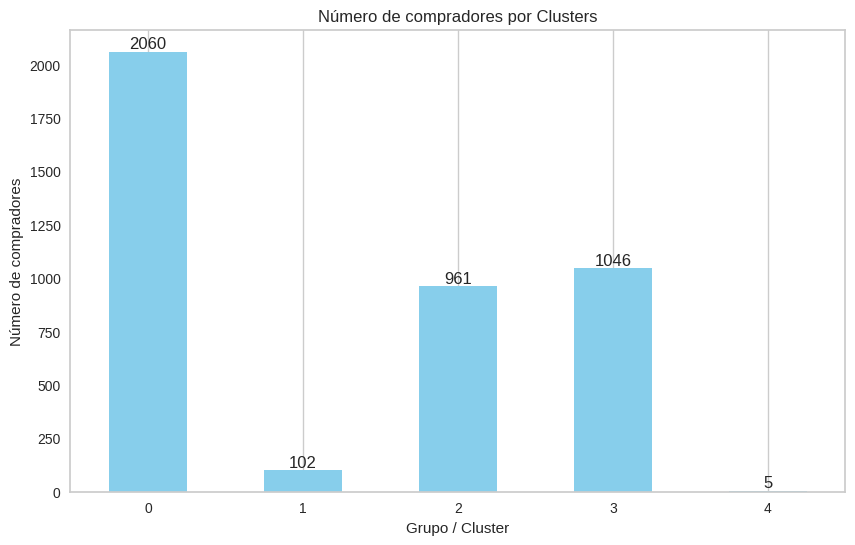

In [59]:
dataframe_unico = dados.merge(usuario, on='CustomerID') # Junta os 2 dataframes usados até agora (dados e o usuario) pela columa principal (CustomerID).

#Grafico mostrando quantidade de compradores por cluster
contagem_compradores = dataframe_unico.groupby('cluster')['CustomerID'].nunique() # Agrupa por cluster e conta quantos identificadores de compradores tem cada cluster.

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_compradores.plot(kind='bar', color='skyblue')
plt.title('Número de compradores por Clusters')
plt.xlabel('Grupo / Cluster')
plt.ylabel('Número de compradores')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adicionando os valores de cada coluna
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center', va='bottom')

plt.show()

O Grupo que mais tem compradores. Ou seja 'CustomerID' unicos.
Observamos na ordem dos que mais possuem compradores os clusters: 0, 3, 2, 1 e 4.

* Cluster que mais realizou compras.

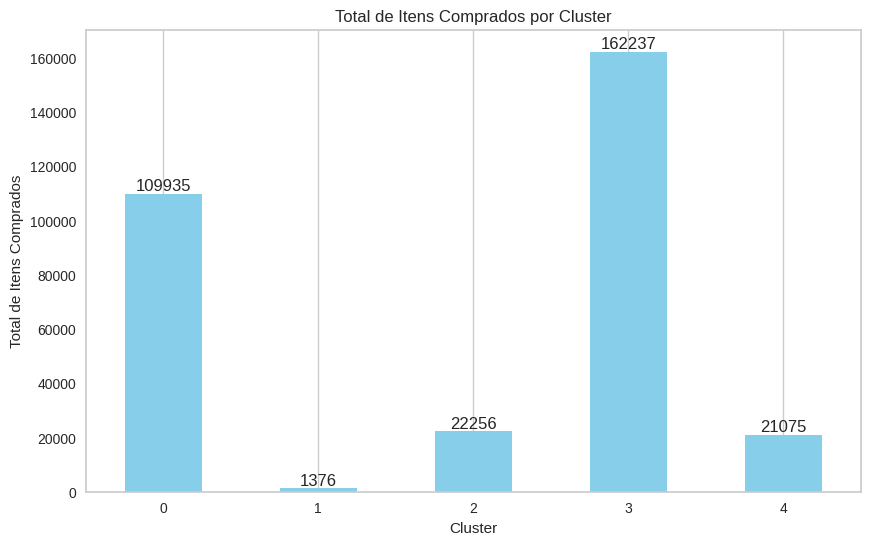

In [60]:
# Realiza contagem de vezes que um membro do cluster realizou uma compra.
total_vezes_por_cluster = dataframe_unico.groupby('cluster')['CustomerID'].count().sort_index()  # Agrupa pelo cluster, conta os identificadores e organiza em ordem crescente


# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = total_vezes_por_cluster.plot(kind='bar', color='skyblue')
plt.title('Total de Itens Comprados por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total de Itens Comprados')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adicionar os valores de cada coluna dentro do gráfico
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(int(i.get_height())), ha='center', va='bottom')

plt.show()

O Grupo que mais realizou compras. Ou seja contagem de vezes que os 'CustomerID' unicos compraram itens.
Observamos na ordem dos que mais vezes compram os clusters: 3, 0, 2, 4 e 1. Podemos contatar que alguns grupos apesar de terem mais usuários realizaram menos compras que outros grupos com mais individuos.

* Cluster que mais itens comprados

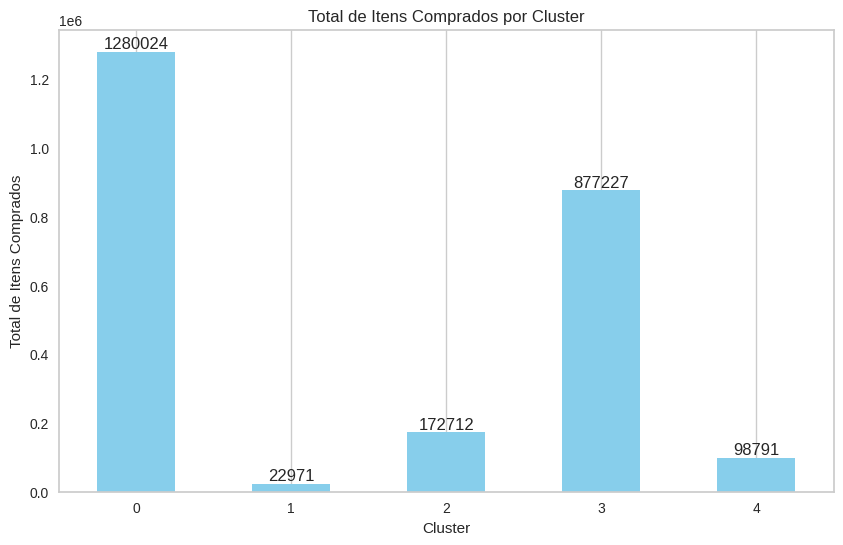

In [61]:
# Realiza soma dos itens comprados pelos membros do cluster.
total_itens_por_cluster = dataframe_unico.groupby('cluster')['Quantity_x'].sum().sort_index() # Agrupa pelo cluster, soma os itens comprados e organiza em ordem crescente dos clusters.

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = total_itens_por_cluster.plot(kind='bar', color='skyblue')
plt.title('Total de Itens Comprados por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total de Itens Comprados')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adicionar os valores de cada coluna dentro do gráfico
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(int(i.get_height())), ha='center', va='bottom')

O Grupo que mais itens comprou. Ou seja soma dos itens comprados por cada 'CustomerID' unicos. Observamos na ordem dos que mais itens compraram os clusters: 0, 3, 2, 4 e 1. Podemos constatar que o grupo do cluster 0 que apresentou maior numero de compradores, apresenta menor número de compras unitarias, comparados com o grupo do cluster 3, mas apresenta maior número de itens comprados. Os grupo do cluster 2 vem se mantendo no centro e os grupos dos clusters 4 e 1 vem apresentando estabilidade na colocação de clusters que mais tem usuários e de suas atividades.


* Cluster com maior valor médio de compras

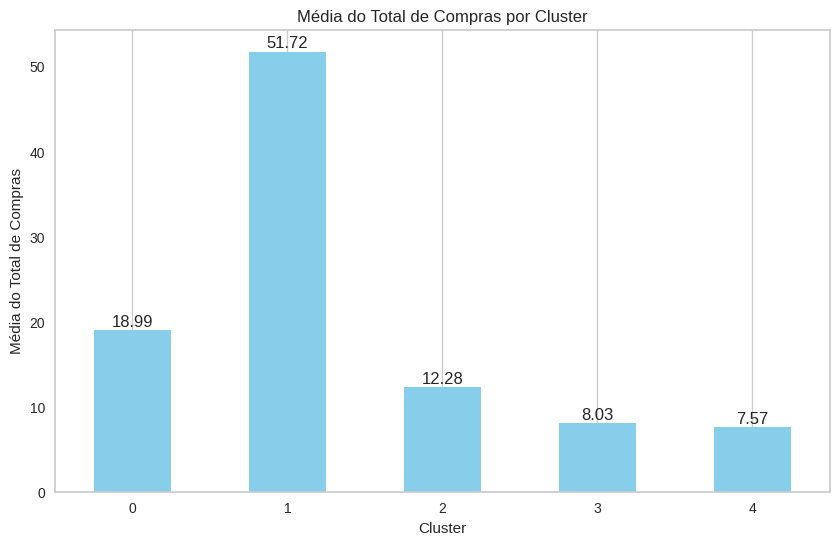

In [62]:
# Calcular a média do total de compras (média da coluna 'Total') por cluster
media_total_compras_por_cluster = dataframe_unico.groupby('cluster')['Total_y'].mean().sort_index() # Agrupa pelo cluster, tira a media do valor total da compra e organiza em ordem crescente dos clusters.

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = media_total_compras_por_cluster.plot(kind='bar', color='skyblue')
plt.title('Média do Total de Compras por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média do Total de Compras')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adicionar os valores de cada coluna dentro do gráfico
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center', va='bottom')

plt.show()

O Grupo com maior media de compras. Ou seja media do valor total das compras  por cada 'CustomerID' unicos. Observamos na ordem dos com maior média de valor comprado os clusters: 1, 0, 2, 3 e 4. Aqui observados uma das principais caracteristicas do grupo do cluster 1. Apesar de estarem na penultima colocação de número de usuários, de realizarem poucas compras e em poucas quantidades o valor total dos itens comprados são elevados. É um grupo que compra pouco, mas compra produtos de grande valor.

* Tabela com os 10 itens mais vendidos

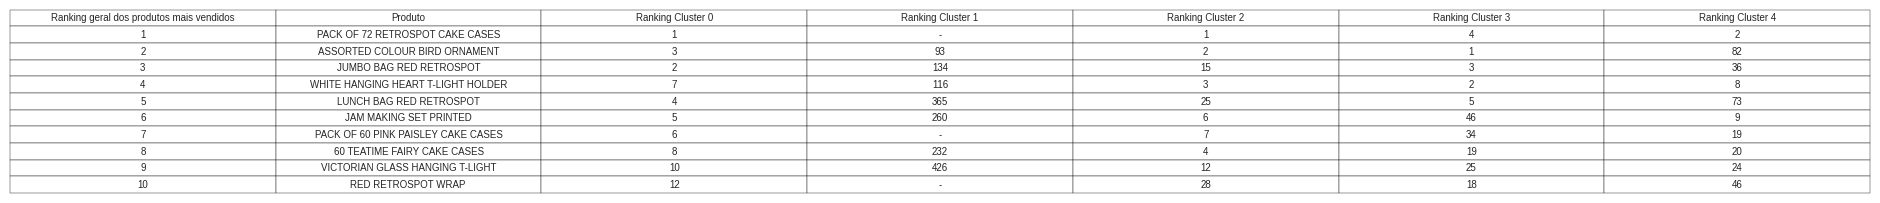

In [63]:
top_10_itens = dataframe_unico.groupby('Description')['Quantity_x'].sum().nlargest(10).index

# Criar a tabela com as colocações dos itens mais vendidos
tabela = pd.DataFrame({'Ranking geral dos produtos mais vendidos': range(1, 11), 'Produto': top_10_itens})

# Iterar sobre cada cluster para calcular o ranking de vendas dos produtos
for cluster in range(0, 5):
    # Filtrar os dados para o cluster atual
    dados_cluster = dataframe_unico[dataframe_unico['cluster'] == cluster]

    # Calcular o ranking de vendas dos produtos para o cluster atual
    ranking_cluster = dados_cluster.groupby('Description')['Quantity_x'].sum().sort_values(ascending=False).reset_index()
    ranking_cluster.index += 1

    # Adicionar uma coluna para o cluster atual na tabela com o ranking de vendas dos produtos correspondentes
    tabela[f'Ranking Cluster {cluster}'] = tabela['Produto'].apply(lambda x: ranking_cluster[ranking_cluster['Description'] == x].index[0] if x in ranking_cluster['Description'].values else '-')

# Plotar a tabela como um gráfico em formato de planilha
plt.figure(figsize=(24, 2))
plt.table(cellText=tabela.values, colLabels=tabela.columns, loc='center', cellLoc='center', fontsize=20)
plt.axis('off')
plt.show()

Coluna 1 (Ranking): Colocação do produto no top 10 mais vendidos;

Coluna 2: Nome do produto;

Colunas restantes: Colocação no produto no ranking dentro do grupo do cluster.

Nessa tabela podemos observar novamente a distinção do grupo do cluster 1 perante os outros grupos. Podemos observar que os itens mais consumidos, de forma geral, não o é por esse grupo, como por exemplo nídido dessa diferença observamos que o item na 1º colocação geral (Pack of 72 retrospot cake cases) que não aparece como produto consumido por esse grupo.

* Top 5 mais vendidos por cluster

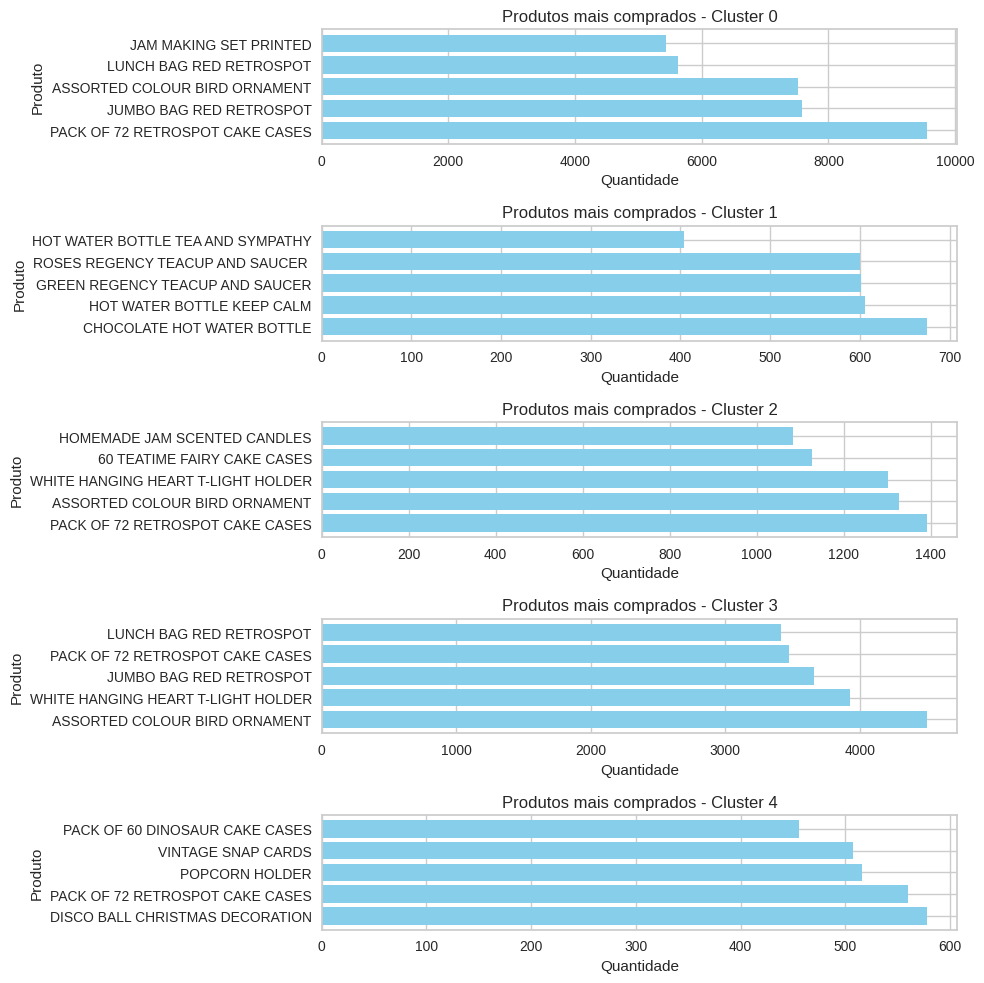

In [64]:
# Agrupe os dados pelo cluster
grupos = dataframe_unico.groupby('cluster')

# Encontre os 05 produtos mais comprados por cada grupo (cluster)
top_05_produtos_por_grupo = {}
for nome_grupo, grupo in grupos:
    contagem_produtos = grupo.groupby('Description')['Quantity_x'].sum().sort_values(ascending=False)
    top_05_produtos_por_grupo[nome_grupo] = contagem_produtos.head(5)

# Criar o gráfico
fig, axs = plt.subplots(len(top_05_produtos_por_grupo), figsize=(10, 2 * len(top_05_produtos_por_grupo)))

for i, (nome_grupo, top_produtos) in enumerate(top_05_produtos_por_grupo.items()):
    axs[i].barh(top_produtos.index, top_produtos.values, color='skyblue')
    axs[i].set_title(f'Produtos mais comprados - Cluster {nome_grupo}')
    axs[i].set_xlabel('Quantidade')
    axs[i].set_ylabel('Produto')

plt.tight_layout()
plt.show()

Aqui podemos observar graficamento os ranking dos 5 produtos mais comprados por cada grupo de cluster. Podendo observar as semelhanças e diferenças já caracterizadas no perfil de compras de cada grupo.

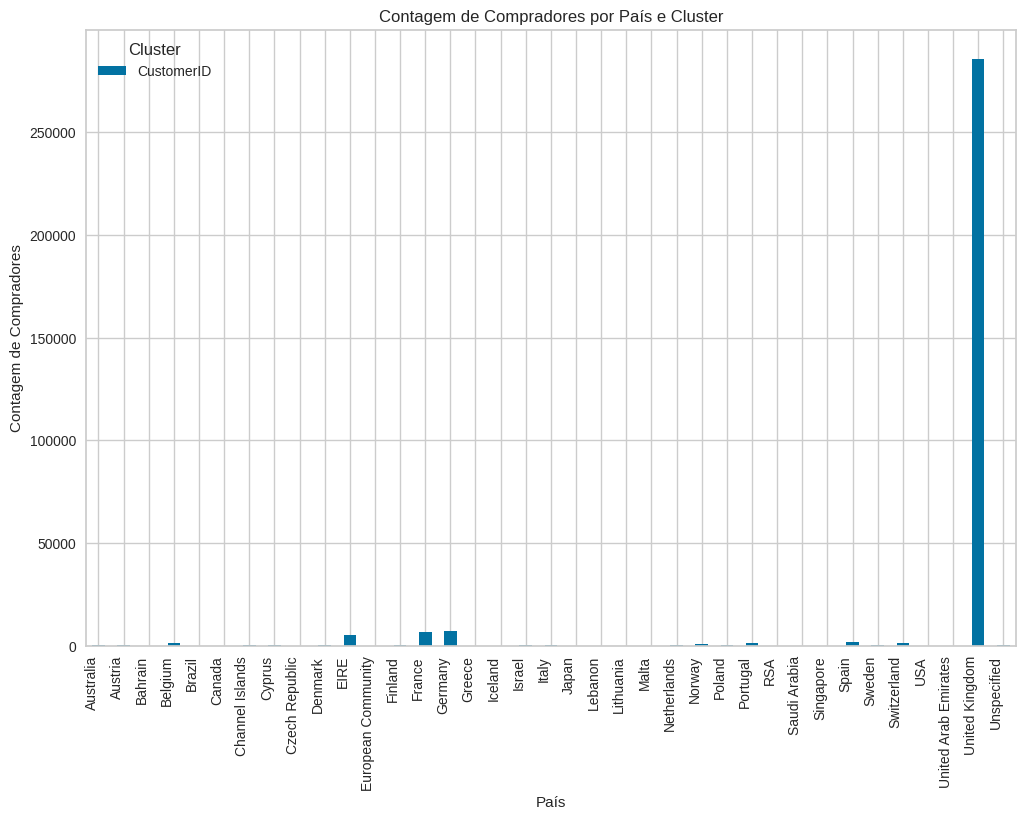

In [65]:
contagem_compradores_pais = dataframe_unico.groupby(['Country'])['CustomerID'].count() # Contagem de compradores por país.

# Plotar o gráfico de barras
contagem_compradores_pais.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Contagem de Compradores por País e Cluster')
plt.xlabel('País')
plt.ylabel('Contagem de Compradores')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Cluster')
plt.show()

Observamos que o país que mais tem compradores é o Reino Unido.

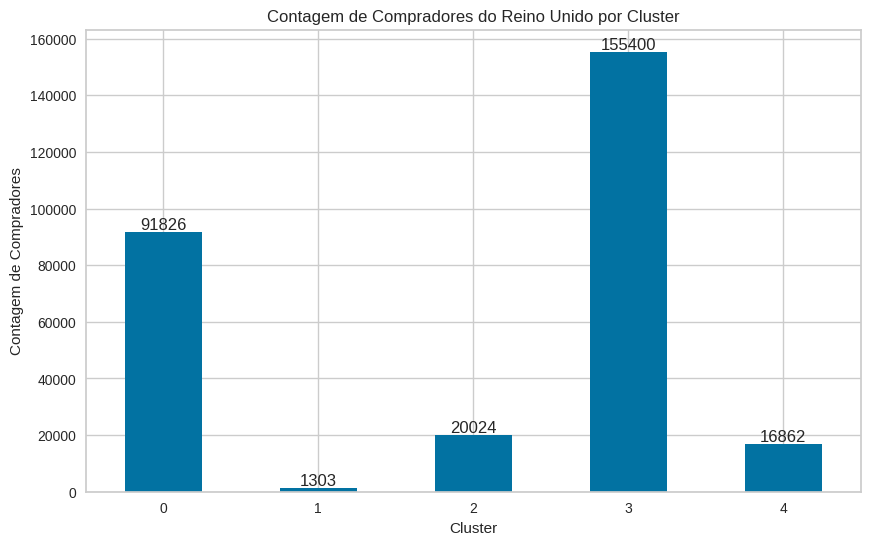

In [66]:
compradores_reino_unido = dataframe_unico[dataframe_unico['Country'] == 'United Kingdom'] # Contagem de compradores só do Reino Unido

# Agrupar os dados por cluster e contar o número de compradores em cada grupo
contagem_compradores_por_cluster = compradores_reino_unido.groupby(['cluster'])['CustomerID'].count()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = contagem_compradores_por_cluster.plot(kind='bar')
plt.title('Contagem de Compradores do Reino Unido por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem de Compradores')
plt.xticks(rotation=0)

# Adicionar os valores dentro das barras
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.show()

Dentro do Reino Unido observamos que o grupo que mais vezes comprou foi o grupo do lcuster 3, seguido do 0, 4, 2 e 1. Acompanhando um padrão semelhante a contagem de compras geral que, na ordem do maior comprador para o menor, foi dos grupos do cluster 3, 0, 2, 4 e 1.

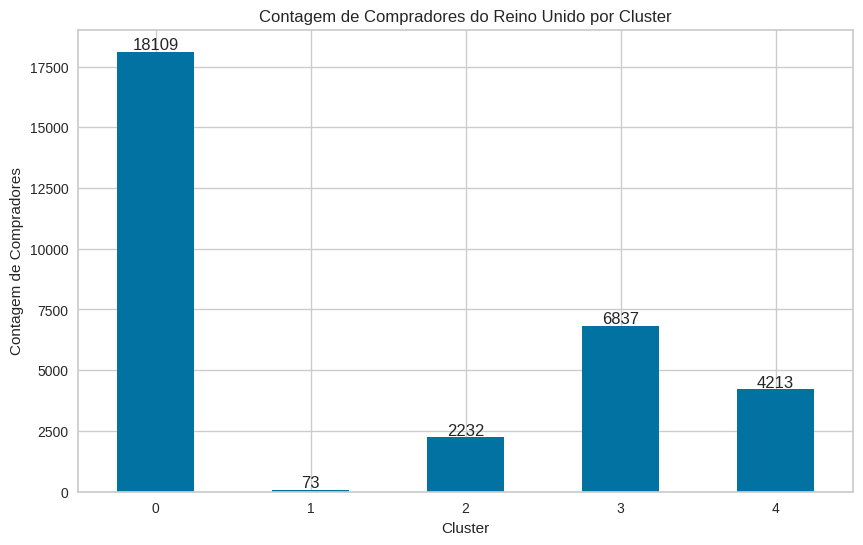

In [67]:
compradores_fora = dataframe_unico[dataframe_unico['Country'] != 'United Kingdom'] #Contagem de compradores fora do Reino Unido

# Agrupar os dados por cluster e contar o número de compradores em cada grupo
contagem_compradores_por_cluster = compradores_fora.groupby(['cluster'])['CustomerID'].count()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = contagem_compradores_por_cluster.plot(kind='bar')
plt.title('Contagem de Compradores do Reino Unido por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem de Compradores')
plt.xticks(rotation=0)

# Adicionar os valores dentro das barras
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.show()

Fora do Reino Unido os grupos de clusters que mais compram na ordem são os do grupo 0, 3, 4, 2 e 1.

# Importancia da análise

Atraves da segmentação de seus clientes a empresa pode, além de identificar o perfil de cada indivíduo e personalizar campanhas de marketing, pode rapidamente identificar em qual grupo de clusters um novo cliente se enquadra e usar a personalização para ofertar produtos especificos para o perfi, potencializando as vendas atraves das campanhas de marketing focadas. Isso gera menos custo com marketing sem personalização para clientes sem perfil de compras do produto. Potencializa a campanha do marketing, pois oferece produtos específicos para cada grupo e suas caracteristicas. O que também pode fidelizar o cliente, por identificar na empresa que suas necessidades são atendidas com mais facilidade. Podemos também atraves dessa analise levar em consideração a origem do país do comprador no planejamento do marketing, pois observamos que essa origem influencia no perfil de compra.

# Sugestão

Baseado no perfil do comprador (frequencia de compra, número de itens comprados, valor médio gasto e pais do comprador) usar esses dados para diferenciar campanhas de marketing para cada perfil do usuário.